In [1]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *

globaldt = 0.01

In [2]:
def make_system(*, gammatau=1.36*0.2, mu=1.36*0.001, beta=0.00027, rho=0.1, alpha=3.6*0.01, delta=0.33, sigma=2, pi=100, end=100):
    init_state = State(R=200, L=0, E=0, V=10)
    t0 = 0
    return System(init=init_state, t0=t0, t_end=end, dt=globaldt,
                  params={'gammatau':gammatau,
                          'mu':mu,
                          'beta':beta,
                          'rho':rho,
                          'alpha':alpha,
                          'delta':delta,
                          'sigma':sigma,
                          'pi': pi
                         }
                 )

In [3]:
def update_func(state: State, t: float, system: System) -> State:
    system.dt = globaldt
    dR = system.params['gammatau'] + -system.params['mu']*state.R + -system.params['beta']*state.R*state.V
    #print(system.params['gammatau'],system.params['mu']*state.R,system.params['beta']*state.R*state.V)
    dR *= system.dt
    
    dL = system.params['rho']*system.params['beta']*state.R*state.V + -system.params['mu']*state.L + -system.params['alpha']*state.L
    dL *= system.dt
    
    dE = (1-system.params['rho'])*system.params['beta']*state.R*state.V + system.params['alpha']*state.L + -system.params['delta']*state.E
    dE *= system.dt
    
    dV = system.params['pi']*state.E + -system.params['sigma']*state.V
    dV *= system.dt
    
    newState = State(R=state.R+dR, L=state.L+dL, E=state.E+dE, V=state.V+dV)
    return newState

In [4]:
def run_sim(system, updateFunc):
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    for t in linrange(system.t0, system.t_end/globaldt):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    return frame



             R           L           E        V
0          200           0           0       10
1      199.995     0.00054     0.00486      9.8
2      199.989  0.00106898  0.00960683  9.60886
3      199.984  0.00158744   0.0142452  9.42629
4      199.979  0.00209582   0.0187795  9.25201
5      199.974  0.00259459   0.0232143  9.08575
6      199.969  0.00308419   0.0275538  8.92725
7      199.964  0.00356504   0.0318019  8.77626
8       199.96  0.00403754   0.0359627  8.63253
9      199.955  0.00450209   0.0400401  8.49585
10      199.95  0.00495908   0.0440376  8.36597
11     199.946  0.00540888   0.0479589  8.24269
12     199.941  0.00585184   0.0518075  8.12579
13     199.937  0.00628832   0.0555866  8.01508
14     199.933  0.00671865   0.0592995  7.91037
15     199.928  0.00714316   0.0629494  7.81146
16     199.924  0.00756216   0.0665393  7.71818
17      199.92  0.00797595    0.070072  7.63036
18     199.916  0.00838485   0.0735505  7.54782
19     199.912  0.00878913   0.0769775  

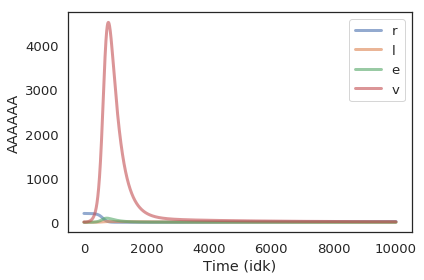

In [5]:
sys = make_system(end=100)
result = run_sim(sys, update_func)
plot(result.R, '-', label='r')
plot(result.L, '-', label='l')
plot(result.E, '-', label='e')
plot(result.V, '-', label='v')
decorate(xlabel='Time (idk)',
         ylabel='AAAAAA')
print(result)

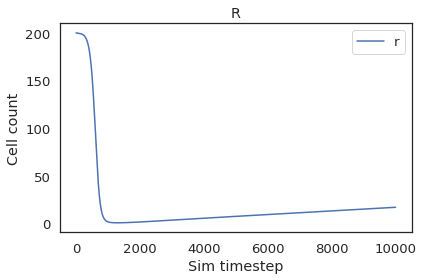

In [6]:
import matplotlib.pyplot as plt

def semilogy(*args, **options):
    x, y, style = parse_plot_args(*args, **options)
    if x is None:
        if isinstance(y, np.ndarray):
            x = np.arange(len(y))
        if isinstance(y, pd.Series):
            x = y.index
            y = y.values
            
    x = magnitudes(x)
    y = magnitudes(y) 
    underride(options, linewidth=3, alpha=0.6)
    
    if style is not None: 
        lines = plt.plot(x, y, style, **options)
    else:
        lines = plt.plot(x, y, **options) 
    return lines
#plot(result.R, '-', label='r')
plt.plot(result.R, '-', label='r')
#plt.plot(result.R, '-', label='r')


decorate(xlabel='Sim timestep',
         ylabel='Cell count',
        title='R')


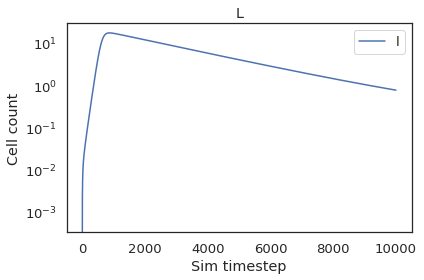

In [7]:
plt.semilogy(result.L, '-', label='l')
decorate(xlabel='Sim timestep',
         ylabel='Cell count',
        title='L')


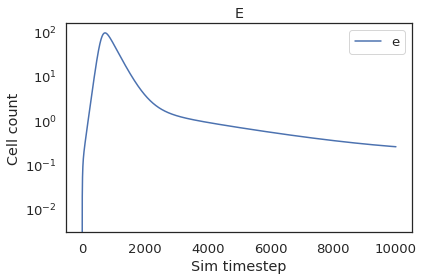

In [8]:
plt.semilogy(result.E, '-', label='e')
decorate(xlabel='Sim timestep',
         ylabel='Cell count',
        title='E')


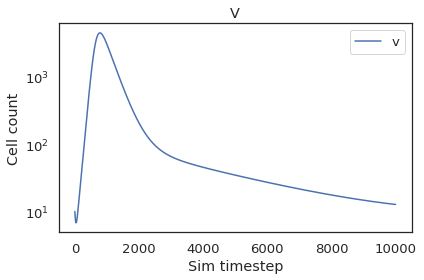

In [9]:
plt.semilogy(result.V, '-', label='v')
decorate(xlabel='Sim timestep',
         ylabel='Cell count',
        title='V')